In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import cufflinks as cf
import numpy as np
import seaborn as sns
import sys
import os

# Data visualization and understanding of the whole dataset 

In [2]:
# read data
df = pd.read_csv("Admission_Predict.csv",sep = ",")

In [3]:
# get basic infor
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
Serial No.           400 non-null int64
GRE Score            400 non-null int64
TOEFL Score          400 non-null int64
University Rating    400 non-null int64
SOP                  400 non-null float64
LOR                  400 non-null float64
CGPA                 400 non-null float64
Research             400 non-null int64
Chance of Admit      400 non-null float64
dtypes: float64(4), int64(5)
memory usage: 28.2 KB


In [4]:
print("There are",len(df.columns),"columns, and", len(df),"cases in the dataset. The variables include:")
for x in df.columns:
    sys.stdout.write(str(x)+", ")

There are 9 columns, and 400 cases in the dataset. The variables include:
Serial No., GRE Score, TOEFL Score, University Rating, SOP, LOR , CGPA, Research, Chance of Admit , 

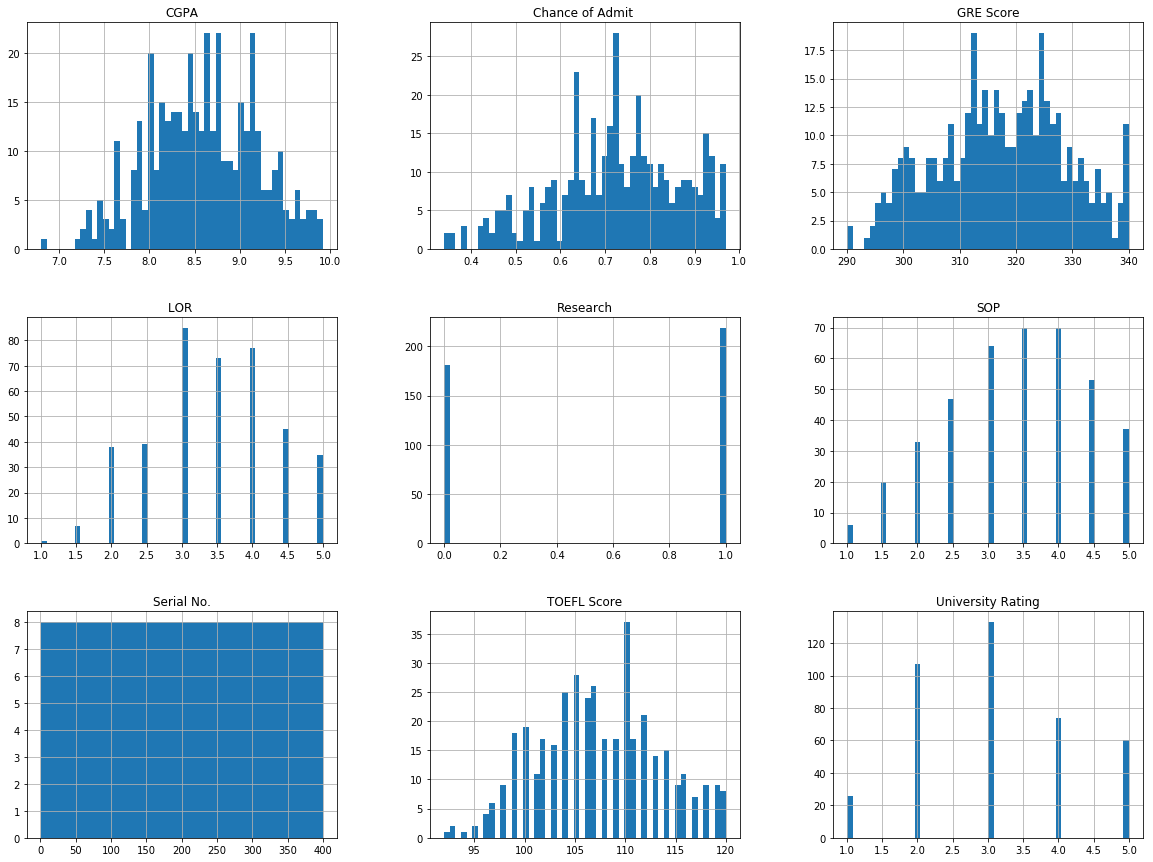

In [5]:
df.hist(bins=50, figsize=(20,15))
plt.show()
# from the graph, we can see that the dataset contains 3 continuous variable, which are GPA, GRE score and TOEFL score, 
# and 4 categorical variables, which are LOR, Research, SOP and university ranking. 
# The outcome, which is the chance of admittion, is also a continuous variable. 
# It is noticabel that the variable Serial No. only represents the case number of each student which does not 
# contain useful information for the prediction model. So we will omit this variable in the further analysis.
# This will also be proved in the correlation analysis in the next steps.

In [6]:
corr_matrix=df.corr()
corr_matrix
# From the correlation matrix, we can see that the serial no is barely correlated with the chance of admission or other features.
# This means that we can delete this variable in the futurue analysis because it does not provide useful information.

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No.,1.000000,-0.097526,-0.147932,-0.169948,-0.166932,-0.088221,-0.045608,-0.063138,0.042336
GRE Score,-0.097526,1.000000,0.835977,0.668976,0.612831,0.557555,0.833060,0.580391,0.802610
TOEFL Score,-0.147932,0.835977,1.000000,0.695590,0.657981,0.567721,0.828417,0.489858,0.791594
University Rating,-0.169948,0.668976,0.695590,1.000000,0.734523,0.660123,0.746479,0.447783,0.711250
SOP,-0.166932,0.612831,0.657981,0.734523,1.000000,0.729593,0.718144,0.444029,0.675732
LOR,-0.088221,0.557555,0.567721,0.660123,0.729593,1.000000,0.670211,0.396859,0.669889
CGPA,-0.045608,0.833060,0.828417,0.746479,0.718144,0.670211,1.000000,0.521654,0.873289
Research,-0.063138,0.580391,0.489858,0.447783,0.444029,0.396859,0.521654,1.000000,0.553202
Chance of Admit,0.042336,0.802610,0.791594,0.711250,0.675732,0.669889,0.873289,0.553202,1.000000


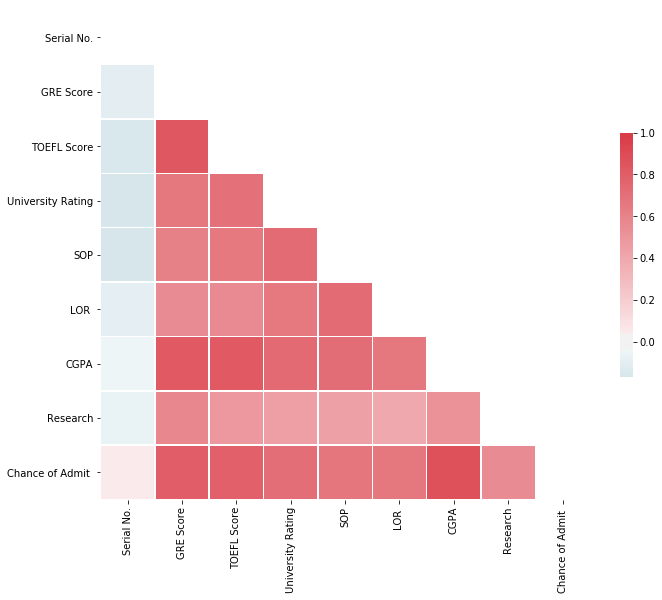

In [7]:
mask = np.zeros_like(corr_matrix, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_matrix, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5},
            xticklabels=corr_matrix.columns.values,
            yticklabels=corr_matrix.columns.values)
plt.show()
# from the graph, we can see that the features that are most positively correlated with the chance of admission are 
# GPA, GRE score and TOEFL score
# The features that are least positively correlated with the chance of admission are 
# Rearch, LOR and SOP.

# Data visualization and analysis for each feature

# GRE

In [8]:
# The plot shows the frequency of GRE score among the candidates 
# From the graph, we can see that the most frequent GRE score is in the range from 310-320.
gre_class = pd.cut(np.array(df[df.columns[1]]),5, labels=["290-300", "300-310", "310-320","320-330","330-340"])
# print(np.array(gre_class))
gre_class = pd.DataFrame(np.array(gre_class), columns =['GRE'])

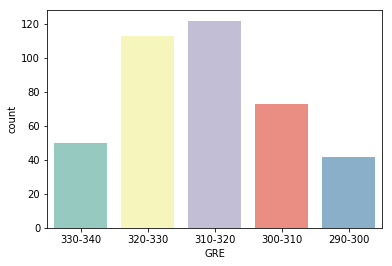

In [9]:
sns.countplot(x="GRE", data=gre_class, palette="Set3")
plt.show()

# TOEFL

In [10]:
print("The minimum TOEFL score is",min(df[df.columns[2]]),"and the maximum TOEFL score is", max(df[df.columns[2]]))
#gre_class = pd.cut(np.array(df[df.columns[2]]),5, labels=["290-300", "300-310", "310-320","320-330","330-340"])
#gre_class = pd.DataFrame(gre_class, columns =['GRE'])

The minimum TOEFL score is 92 and the maximum TOEFL score is 120


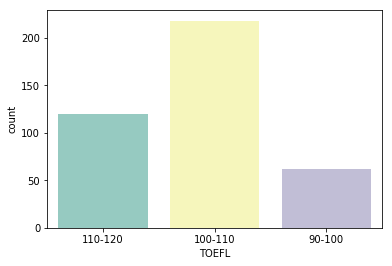

In [11]:
toefl_class = pd.cut(np.array(df[df.columns[2]]),bins=[90,100,110,120], labels=["90-100",'100-110','110-120'])
toefl_class = pd.DataFrame(np.array(toefl_class), columns =['TOEFL'])
sns.countplot(x="TOEFL", data=toefl_class, palette="Set3")
plt.show()

# GPA VS GRE

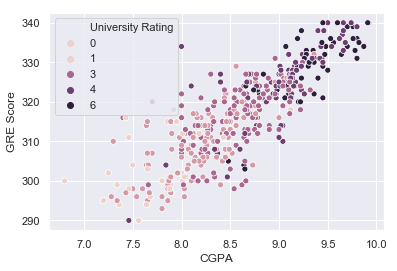

In [12]:
# the graph shows a positive linearity relationship between GPA and GRE
# better GPA is correlated with better GRE score
# also candidates with higher university ranking tend to have higher GPA and higher GRE score
sns.set()
sns.scatterplot(y=df[df.columns[1]], x=df[df.columns[-3]],
                hue=df[df.columns[3]],
                data=df)
plt.show()

# University ranking

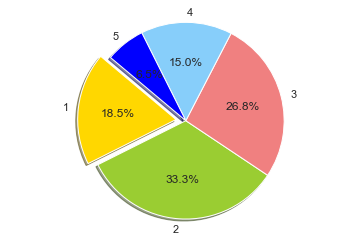

In [13]:
# Data to plot
labels = list(set(df[df.columns[3]]))
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue','blue']
sizes = list(Counter(df[df.columns[3]]).values())
explode = (0.1, 0, 0, 0, 0)  # explode 1st slice
 
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)
 
plt.axis('equal')
plt.show()

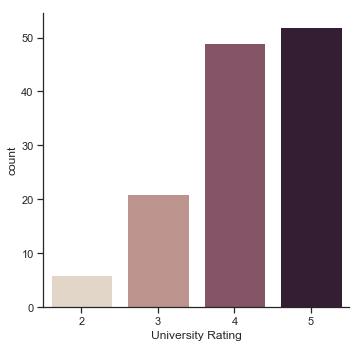

In [22]:
# Among the candidates with high admission change, the most of them are coming from higher-ranked colleges 
ranking_ = df[df[df.columns[-1]] >= 0.8]
sns.catplot(x=df.columns[3], kind="count", palette="ch:.25", data=ranking_);
plt.show()

# SOP VS GPA

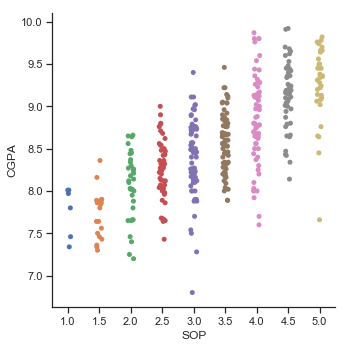

In [20]:
sns.catplot(x=df.columns[4], y=df.columns[-3], data=df);
plt.show()
# better SOP associated with higher G

# SOP VS GRE

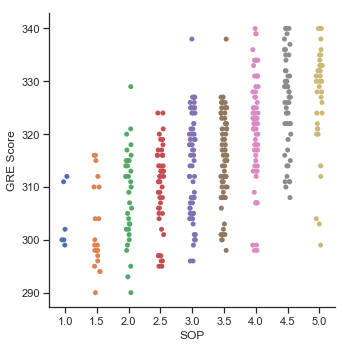

In [21]:
sns.catplot(x=df.columns[4], y=df.columns[1], data=df);
plt.show()
# better SOP associated with better GRE score

# LOP VS GPA

/Users/elena/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



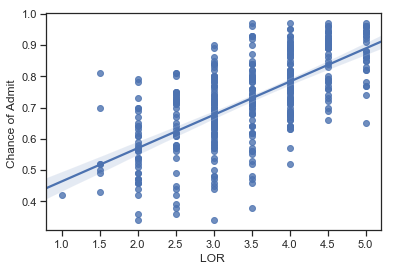

In [24]:
# stronger recommendation letter associated with higher chance of admission
sns.regplot(x=df[df.columns[5]], y=df[df.columns[-1]], data=df)
plt.show()

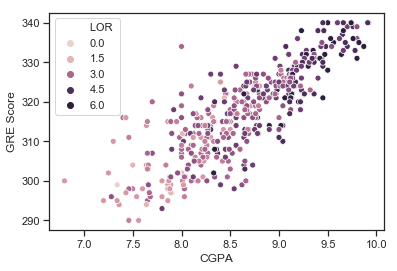

In [25]:
# the graph shows a positive linearity relationship between GPA and GRE
# better GPA is correlated with better GRE score
# also candidates with stronger recommendation letter tend to have higher GPA and higher GRE score
sns.scatterplot(y=df[df.columns[1]], x=df[df.columns[-3]],
                hue=df[df.columns[5]],
                data=df)
plt.show()

# Research

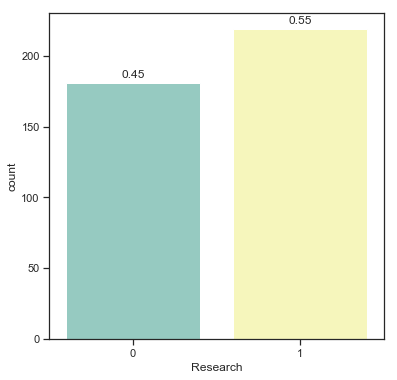

In [26]:
f, ax = plt.subplots(figsize=(6,6))
ax = sns.countplot(x=df.columns[-2], data=df, palette="Set3")
total = float(len(df))
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format(height/total),
            ha="center") 
plt.show()